# Session 4 - Resampling Methods

## Content

- [Cross-Validation](#Cross-Validation)
- [The Bootstrap](#The-Bootstrap)

## Labs

- [The Validation Set Approach](The-Validation-Set-Approach)
- [Leave-One-Out Cross-Validation](Leave-One-Out-Cross-Validation)
- [k-Fold Cross-Validation](k-Fold-Cross-Validation)
- [The Bootstrap](The-Bootstrap)

In [16]:
# Import
import pandas as pd
import numpy as np
import seaborn as sns

import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, LeaveOneOut, KFold, cross_val_score
from sklearn.preprocessing import PolynomialFeatures

In [3]:
# Import matplotlib for graphs
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

# Set global parameters
%matplotlib inline
plt.style.use('seaborn-white')
plt.rcParams['figure.figsize'] = (10,7)
plt.rcParams['figure.titlesize'] = 20
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12

## Cross-Validation

For this exercise we are going to use the car dataset.

In [5]:
df1 = pd.read_csv('data/Auto.csv', na_values='?').dropna()

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


### Figure 5.2 - Validation Set Approach
Using Polynomial feature generation in scikit-learn<BR>
http://scikit-learn.org/dev/modules/preprocessing.html#generating-polynomial-features

In [7]:
t_prop = 0.5
p_order = np.arange(1,11)
r_state = np.arange(0,10)

X, Y = np.meshgrid(p_order, r_state, indexing='ij')
Z = np.zeros((p_order.size,r_state.size))

regr = skl_lm.LinearRegression()

# Generate 10 random splits of the dataset
for (i,j),v in np.ndenumerate(Z):
    poly = PolynomialFeatures(int(X[i,j]))
    X_poly = poly.fit_transform(df1.horsepower.values.reshape(-1,1))
    
    X_train, X_test, y_train, y_test = train_test_split(X_poly, df1.mpg.ravel(),
                                                        test_size=t_prop, random_state=Y[i,j])
                                                                        
    regr.fit(X_train, y_train)
    pred = regr.predict(X_test)
    Z[i,j]= mean_squared_error(y_test, pred)

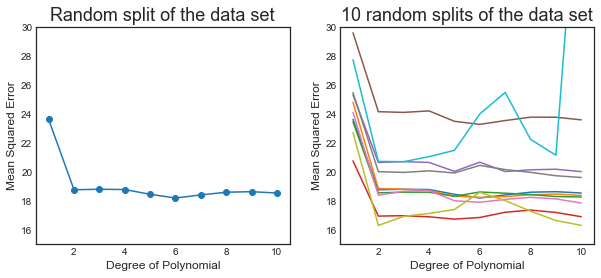

In [8]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4))

# Left plot (first split)
ax1.plot(X.T[0],Z.T[0], '-o')
ax1.set_title('Random split of the data set')

# Right plot (all splits)
ax2.plot(X,Z)
ax2.set_title('10 random splits of the data set')

for ax in fig.axes:
    ax.set_ylabel('Mean Squared Error')
    ax.set_ylim(15,30)
    ax.set_xlabel('Degree of Polynomial')
    ax.set_xlim(0.5,10.5)
    ax.set_xticks(range(2,11,2));

### Figure 5.4

In [9]:
p_order = np.arange(1,11)
r_state = np.arange(0,10)

# LeaveOneOut CV
regr = skl_lm.LinearRegression()
loo = LeaveOneOut()
loo.get_n_splits(df1)
scores = list()

for i in p_order:
    poly = PolynomialFeatures(i)
    X_poly = poly.fit_transform(df1.horsepower.values.reshape(-1,1))
    score = cross_val_score(regr, X_poly, df1.mpg, cv=loo, scoring='neg_mean_squared_error').mean()
    scores.append(score)

In [10]:
# k-fold CV
folds = 10
elements = len(df1.index)

X, Y = np.meshgrid(p_order, r_state, indexing='ij')
Z = np.zeros((p_order.size,r_state.size))

regr = skl_lm.LinearRegression()

for (i,j),v in np.ndenumerate(Z):
    poly = PolynomialFeatures(X[i,j])
    X_poly = poly.fit_transform(df1.horsepower.values.reshape(-1,1))
    kf_10 = KFold(n_splits=folds, random_state=Y[i,j])
    Z[i,j] = cross_val_score(regr, X_poly, df1.mpg, cv=kf_10, scoring='neg_mean_squared_error').mean()    

/usr/local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
/usr/local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
/usr/local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
/usr/local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will

/usr/local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
/usr/local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
/usr/local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
/usr/local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will

/usr/local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
/usr/local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
/usr/local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
/usr/local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will

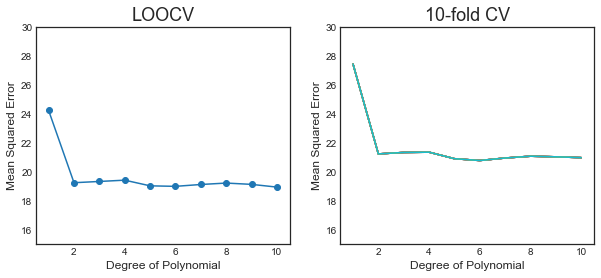

In [11]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4))

# Note: cross_val_score() method return negative values for the scores.
# https://github.com/scikit-learn/scikit-learn/issues/2439

# Left plot
ax1.plot(p_order, np.array(scores)*-1, '-o')
ax1.set_title('LOOCV')

# Right plot
ax2.plot(X,Z*-1)
ax2.set_title('10-fold CV')

for ax in fig.axes:
    ax.set_ylabel('Mean Squared Error')
    ax.set_ylim(15,30)
    ax.set_xlabel('Degree of Polynomial')
    ax.set_xlim(0.5,10.5)
    ax.set_xticks(range(2,11,2));

## The Bootstrap

The bootstrap is a widely applicable and extremely powerful statistical tool that can be used to quantify the uncertainty associated with a given estimator or statistical learning method. 

In the specific case of linear regression, this is not particularly useful since there exist a formula for the standard errors.

However, the power of the bootstrap lies in the fact that it can be easily applied to a wide range of statistical learning methods, including some for which a measure of vari- ability is otherwise difficult to obtain and is not automatically output by statistical software.

## Labs

### The Validation Set Approach

In [ ]:
import pandas as pd
import numpy as np
import sklearn.linear_model as skl_lm
import matplotlib.pyplot as plt

In this section, we'll explore the use of the validation set approach in order to estimate the
test error rates that result from fitting various linear models on the ${\tt Auto}$ data set.

In [ ]:
df1 = pd.read_csv('Auto.csv', na_values='?').dropna()
df1.info()

We begin by using the ${\tt sample()}$ function to split the set of observations
into two halves, by selecting a random subset of 196 observations out of
the original 392 observations. We refer to these observations as the training
set.

We'll use the ${\tt random\_state}$ parameter in order to set a seed for
${\tt python}$’s random number generator, so that you'll obtain precisely the same results each time. It is generally a good idea to set a random seed when performing an analysis such as cross-validation
that contains an element of randomness, so that the results obtained can be reproduced precisely at a later time.

In [ ]:
train_df = df1.sample(196, random_state = 1)
test_df = df1[~df1.isin(train_df)].dropna(how = 'all')

X_train = train_df['horsepower'].values.reshape(-1,1)
y_train = train_df['mpg']
X_test = test_df['horsepower'].values.reshape(-1,1)
y_test = test_df['mpg']

We then use ${\tt LinearRegression()}$ to fit a linear regression to predict ${\tt mpg}$ from ${\tt horsepower}$ using only
the observations corresponding to the training set.

In [ ]:
lm = skl_lm.LinearRegression()
model = lm.fit(X_train, y_train)

We now use the ${\tt predict()}$ function to estimate the response for the test
observations, and we use ${\tt sklearn}$ to caclulate the MSE.

In [ ]:
pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test, pred)
    
print(MSE)

Therefore, the estimated test MSE for the linear regression fit is 23.36. We
can use the ${\tt PolynomialFeatures()}$ function to estimate the test error for the polynomial
and cubic regressions.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Quadratic
poly = PolynomialFeatures(degree=2)
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

model = lm.fit(X_train2, y_train)
print(mean_squared_error(y_test, model.predict(X_test2)))

# Cubic
poly = PolynomialFeatures(degree=3)
X_train3 = poly.fit_transform(X_train)
X_test3 = poly.fit_transform(X_test)

model = lm.fit(X_train3, y_train)
print(mean_squared_error(y_test, model.predict(X_test3)))

These error rates are 20.25 and 20.33, respectively. If we choose a different
training set instead, then we will obtain somewhat different errors on the
validation set. We can test this out by setting a different random seed:

In [ ]:
train_df = df1.sample(196, random_state = 2)
test_df = df1[~df1.isin(train_df)].dropna(how = 'all')

X_train = train_df['horsepower'].values.reshape(-1,1)
y_train = train_df['mpg']
X_test = test_df['horsepower'].values.reshape(-1,1)
y_test = test_df['mpg']

# Linear
model = lm.fit(X_train, y_train)
print(mean_squared_error(y_test, model.predict(X_test)))

# Quadratic
poly = PolynomialFeatures(degree=2)
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

model = lm.fit(X_train2, y_train)
print(mean_squared_error(y_test, model.predict(X_test2)))

# Cubic
poly = PolynomialFeatures(degree=3)
X_train3 = poly.fit_transform(X_train)
X_test3 = poly.fit_transform(X_test)

model = lm.fit(X_train3, y_train)
print(mean_squared_error(y_test, model.predict(X_test3)))

Using this split of the observations into a training set and a validation
set, we find that the validation set error rates for the models with linear,
quadratic, and cubic terms are 25.11, 19.72, and 19.92, respectively.

These results are consistent with our previous findings: a model that
predicts ${\tt mpg}$ using a quadratic function of ${\tt horsepower}$ performs better than
a model that involves only a linear function of ${\tt horsepower}$, and there is
little evidence in favor of a model that uses a cubic function of ${\tt horsepower}$.

### 5.3.2 Leave-One-Out Cross-Validation

The LOOCV estimate can be automatically computed for any generalized linear model using the `LeaveOneOut()` and `KFold()` functions.

In [ ]:
model = lm.fit(X_train, y_train)

from sklearn.model_selection import cross_val_score
loo = LeaveOneOut()
X = df1['horsepower'].values.reshape(-1,1)
y = df1['mpg'].values.reshape(-1,1)
loo.get_n_splits(X)

from sklearn.model_selection import KFold

crossvalidation = KFold(n_splits=392, random_state=None, shuffle=False)

scores = cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=crossvalidation,
 n_jobs=1)

print("Folds: " + str(len(scores)) + ", MSE: " + str(np.mean(np.abs(scores))) + ", STD: " + str(np.std(scores)))


Our cross-validation estimate for the test error is approximately 24.23. We can repeat this procedure for increasingly complex polynomial fits.
To automate the process, we use the `for()` function to initiate a for loop
which iteratively fits polynomial regressions for polynomials of order `i = 1`
to `i = 5` and computes the associated cross-validation error. 

This command may take a couple of minutes to run.

In [ ]:
for i in range(1,6):
    poly = PolynomialFeatures(degree=i)
    X_current = poly.fit_transform(X)
    model = lm.fit(X_current, y)
    scores = cross_val_score(model, X_current, y, scoring="neg_mean_squared_error", cv=crossvalidation,
 n_jobs=1)
    
    print("Degree-"+str(i)+" polynomial MSE: " + str(np.mean(np.abs(scores))) + ", STD: " + str(np.std(scores)))


Here we see a sharp drop in the estimated test MSE between
the linear and quadratic fits, but then no clear improvement from using
higher-order polynomials.

### k-Fold Cross-Validation

The `KFold` function can (intuitively) also be used to implement `k`-fold CV. Below we
use `k = 10`, a common choice for `k`, on the `Auto` data set. We once again set
a random seed and initialize a vector in which we will print the CV errors
corresponding to the polynomial fits of orders one to ten.

In [ ]:
crossvalidation = KFold(n_splits=10, random_state=1, shuffle=False)

for i in range(1,11):
    poly = PolynomialFeatures(degree=i)
    X_current = poly.fit_transform(X)
    model = lm.fit(X_current, y)
    scores = cross_val_score(model, X_current, y, scoring="neg_mean_squared_error", cv=crossvalidation,
 n_jobs=1)
    
    print("Degree-"+str(i)+" polynomial MSE: " + str(np.mean(np.abs(scores))) + ", STD: " + str(np.std(scores)))

Notice that the computation time is **much** shorter than that of LOOCV.
(In principle, the computation time for LOOCV for a least squares linear
model should be faster than for `k`-fold CV, due to the availability of the
formula (5.2) for LOOCV; however, unfortunately the `KFold()` function
does not make use of this formula.) We still see little evidence that using
cubic or higher-order polynomial terms leads to lower test error than simply
using a quadratic fit.

#### An Application to Default Data

Now that you're armed with more useful technique for resampling your data, let's try fitting a model for the `Default` dataset:

In [ ]:
df2 = pd.read_csv('Default.csv', na_values='?').dropna()
df2.describe()

First we'll try just holding out a random 20% of the data:

In [ ]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, classification_report

for i in range(1,11):
    train_df2 = df2.sample(8000, random_state = i)
    test_df2 = df2[~df2.isin(train_df2)].dropna(how = 'all')
    
    # Fit a logistic regression to predict default using balance
    model = smf.glm('default~balance', data=train_df2, family=sm.families.Binomial())
    result = model.fit()
    predictions_nominal = [ "Yes" if x < 0.5 else "No" for x in result.predict(test_df2)]
    print("----------------")
    print("Random Seed = " + str(i) + "")
    print("----------------")
    print(confusion_matrix(test_df2["default"], 
                       predictions_nominal))
    print(classification_report(test_df2["default"], 
                            predictions_nominal, 
                            digits = 3))
    print()
    

Our accuracy is really high on this data, but we're getting different error rates depending on how we choose our test set. That's no good!

Unfortunately this dataset is too big for us to run LOOCV, so we'll have to settle for `k`-fold. In the space below, build a logistic model on the full `Default` dataset and then run 5-fold cross-validation to get a more accurate estimate of your test error rate:

In [15]:
# Your code here

### The Bootstrap

We illustrate the use of the bootstrap in the simple example of Section 5.2,
as well as on an example involving estimating the accuracy of the linear
regression model on the `Auto`data set.

#### Estimating the Accuracy of a Statistic of Interest

One of the great advantages of the bootstrap approach is that it can be
applied in almost all situations. No complicated mathematical calculations
are required. Performing a bootstrap analysis in R entails only two steps.

- First, we must create a function that computes the statistic of interest.
- Second, we use the `boot()` function, which is part of the boot library, to perform the bootstrap by repeatedly sampling observations from the data set with replacement.

The `Portfolio` data set in the `ISLR` package is described in Section 5.2. It has variables called `X` and `Y`. 

In [ ]:
portfolio_df = pd.read_csv('Portfolio.csv')
portfolio_df.head()

To illustrate the use of the bootstrap on this data, we must first create
a function, `alpha()`, which takes as input the data and outputs the estimate for $\alpha$ (described in more detail on page 187).

In [ ]:
def alpha(X,Y):
    return ((np.var(Y)-np.cov(X,Y))/(np.var(X)+np.var(Y)-2*np.cov(X,Y)))

This function returns, or outputs, an estimate for $\alpha$ based on applying
(5.7) to the observations indexed by the argument index. For instance, the
following command tells `python` to estimate $\alpha$ using all 100 observations.

In [ ]:
X = portfolio_df.X[0:100]
y = portfolio_df.Y[0:100]
print(alpha(X,y))

The next command uses the `sample()` function to randomly select 100 observations
from the range 1 to 100, with replacement. This is equivalent
to constructing a new bootstrap data set and recomputing $\hat{\alpha}$ based on the
new data set.

In [ ]:
dfsample = portfolio_df.sample(frac=1, replace=True)
X = dfsample.X[0:100]
y = dfsample.Y[0:100]
print(alpha(X,y))

We can implement a bootstrap analysis by performing this command many
times, recording all of the corresponding estimates for $\alpha$, and computing the resulting standard deviation. However, the `boot()`function automates
this approach. Below we produce $1,000$ bootstrap estimates for $\alpha$:

In [ ]:
def bstrap(df):
    tresult = 0
    for i in range(0,1000):
        dfsample = df.sample(frac=1, replace=True)
        X = dfsample.X[0:100]
        y = dfsample.Y[0:100]
        result = alpha(X,y)
        tresult += result
    fresult = tresult / 1000
    print(fresult)
bstrap(portfolio_df)

The final output shows that using the original data, $\hat{\alpha} = 0.58$, and that the bootstrap estimate for $SE(\hat{\alpha})$ is 0.18.

#### Estimating the Accuracy of a Linear Regression Model

The bootstrap approach can be used to assess the variability of the coefficient
estimates and predictions from a statistical learning method. Here
we use the bootstrap approach in order to assess the variability of the
estimates for $\beta_0$ and $\beta_1$, the intercept and slope terms for the linear regression
model that uses horsepower to predict mpg in the Auto data set. We
will compare the estimates obtained using the bootstrap to those obtained
using the formulas for $SE(\hat{\beta}_0)$ and $SE(\hat{\beta}_1)$ described in Section 3.1.2.

First let's refresh our memory about a linear model of the `Auto` dataset:

In [14]:
from sklearn.utils import resample

auto_df = pd.read_csv('data/Auto.csv')

auto_df.describe()

,mpg,cylinders,displacement,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,2970.261965,15.555668,75.994962,1.574307
std,7.825804,1.701577,104.379583,847.904119,2.749995,3.690005,0.802549
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,2223.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3609.000000,17.100000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [ ]:
lm = skl_lm.LinearRegression()
X = auto_df['horsepower'].values.reshape(-1,1)
y = auto_df['mpg']
clf = lm.fit(X,y)
print(clf.coef_, clf.intercept_)

Next, we use the `bootstrap()`function to compute the standard errors of 1,000
bootstrap estimates for the intercept and slope terms:

In [ ]:
from sklearn.metrics import mean_squared_error

Xsamp, ysamp = resample(X, y, n_samples=1000)
clf = lm.fit(Xsamp,ysamp)
print('Intercept: ' + str(clf.intercept_) + " Coef: " + str(clf.coef_))